In [1]:
import numpy as np
from math import factorial, exp
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

# Discrete Random Variables
Notes based on [Probability course's chapter 3](https://www.probabilitycourse.com/chapter3/3_1_1_random_variables.php).

## Basic Concepts

### Range
A random variable is a 'real-valued' function that assigns a numerical value to each possible outcome of a random experiment. Essentially mapping a set numerical values to a set of possibly non-numerical values.   

$X : S \rightarrow \mathbb{R}$

Say you flip a coin twice, then the possible results are defined as such:

In [2]:
coin = ["Heads", "Tails"]
outcomes = [(c1, c2) for c1 in coin for c2 in coin]
outcomes

[('Heads', 'Heads'),
 ('Heads', 'Tails'),
 ('Tails', 'Heads'),
 ('Tails', 'Tails')]

The possible results is a list (or sample space) of length 4. Each unique outcome can then be mapped to a numerical value. 
The numerical values used are called the range of a random variable.

In [3]:
x_range = list(range(len(outcomes)))
x_range

[0, 1, 2, 3]

In [4]:
mapped_x = list(zip(x_range, outcomes))
mapped_x

[(0, ('Heads', 'Heads')),
 (1, ('Heads', 'Tails')),
 (2, ('Tails', 'Heads')),
 (3, ('Tails', 'Tails'))]

$(X) = R_{X} = \{0,1,2,3\}$

### Difference between Discrete and Continuous random variables

A random variable is considered discrete when its range is countable. A range is a set, and a set is countable when it is either:

* A finite set such as $\{1,2,3\}$, or
* It can be put in one-to-one correspondence with natural numbers. These types of sets are said to be countably infinite.

### Probability Mass Function (PMF)

Random variables are often denoted by use of capital letters, $X, Y, Z$, etc. The numbers in a random variable's range, however, are usually denoted by lowercase letters such as $x_{1}, x_{2}, y_{1}, z_{1}$, etc.

In order to figure out the probability of the event where $X = x_{k}$, the **probability mass function** may be used. The first step, is to define the event:  

$A = \{ s \in S | X(s) = x_{k} \}$  

Next, to define the **probability mass function**:

$P_{X}(x_{k}) = P(X = x_{k})$ where
> $R_{X} = \{x_{0}, x_{1}, x_{2},...\}$  
> $k = 0, 1, 2,...$



In [5]:
S = sorted([outcome.count("Heads") for outcome in outcomes])
X_range = list(range(len(set(S))))
S, X_range

([0, 1, 1, 2], [0, 1, 2])

In [6]:
def PMF(S, i):
    """S : Sample space, i : Index, returns  probability mass function of item i in S"""
    return S.count(S[i]) / len(S)


In [7]:
for i in range(len(S)):
    print(f"PMF for S(x_k) = {S[i]}: {PMF(S, i)}")

PMF for S(x_k) = 0: 0.25
PMF for S(x_k) = 1: 0.5
PMF for S(x_k) = 1: 0.5
PMF for S(x_k) = 2: 0.25


The **probability mass function** is also called the **probability distribution**.

### Independent Random Variables

### Special Distributions

In [8]:
def plot_distribution(chances, p, name=""):
    fig, axs = plt.subplots(1,1)
    max_ = max(chances, key=lambda x : x[1])[1]
    if max_ < 0.5:
        ylim = max_ + 0.1
    else:
        ylim = 1
    
    axs.set_ylim((0, ylim))
    axs.set_xlim((0, len(chances)))
    for k, PXk in chances:
        axs.axvline(x=k, ymax=PXk/ylim)
        axs.scatter(k, PXk, color="blue")
    axs.set_title(f"PMF {name}({p})")
    plt.show()

#### Bernoulli
$
\begin{equation}
             \nonumber P_X(x) = \left\{
              \begin{array}{l l}
                 p& \quad \text{for  } x=1\\
                1-p & \quad \text{ for } x=0\\
                0  & \quad \text{ otherwise}
              \end{array} \right.
            \end{equation}
$

#### Geometric
$
\begin{equation}
             \nonumber P_X(k) = \left\{
              \begin{array}{l l}
                 p(1-p)^{k-1}& \quad \text{for  } k=1,2,3,...\\
                0  & \quad \text{ otherwise}
              \end{array} \right.
            \end{equation}$

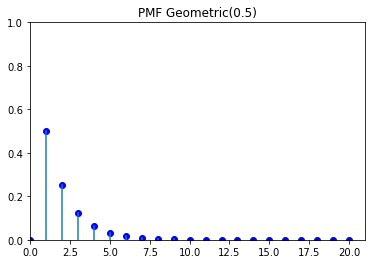

In [9]:
def geometric(p=0.5, x_range=20):
    chances = [(0,0)]
    
    for k in range(1, x_range + 1):
        chances.append((k, (p * (1-p)**(k-1))))
    plot_distribution(chances, p, name="Geometric")
    return chances
    
_ = geometric()

#### Binomial 
$\begin{equation}
             \nonumber P_X(k) = \left\{
              \begin{array}{l l}
                 {n \choose k}p^k(1-p)^{n-k}& \quad \text{for  } k=0,1,2,\cdots,n\\
                0  & \quad \text{otherwise}
              \end{array} \right.
            \end{equation}$

In [10]:
def binomial_coef(n, k, n_fac=None):
    if n_fac == None:
        n_fac = factorial(n)
  
    return n_fac / (factorial(k) * factorial(n - k))


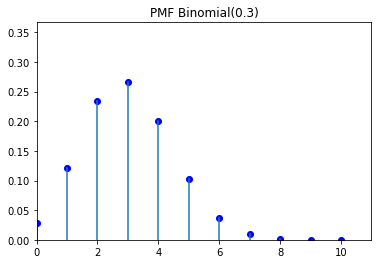

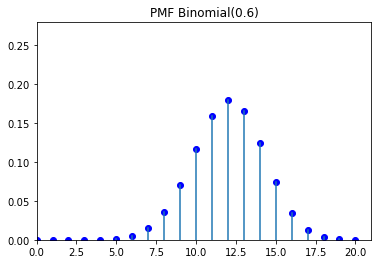

In [11]:
def binomial(p=0.3, n=10):
    chances = []
    n_factorial = factorial(n)
    for k in range(n + 1):
        chances.append((k, binomial_coef(n, k, n_fac=n_factorial) * p**k * (1-p)**(n-k)))
        
    plot_distribution(chances, p, name="Binomial")
    return chances

_ = binomial()

_ = binomial(p=0.6, n=20)

#### Negative Binomial (Pascal)
$\begin{equation}
             \nonumber P_X(k) = \left\{
              \begin{array}{l l}
                 {k-1 \choose m-1} p^{m}(1-p)^{k-m}& \quad \text{for  } k=m,m+1,m+2,m+3,...\\
                0  & \quad \text{otherwise}
              \end{array} \right.
            \end{equation}$

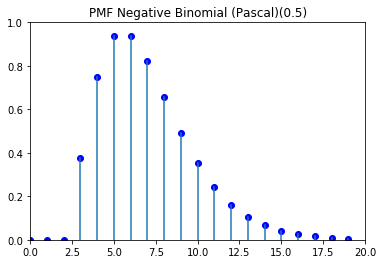

In [12]:
def pascal(p=0.5, m=3, length=20):
    chances = [(x, 0) for x in range(m)]
    for k in range(m, length):
        k_factorial = factorial(k)
        chances.append((k, binomial_coef(k-1, m-1, n_fac=k_factorial) * p**m * (1-p)**(k-m)))
    plot_distribution(chances, p, name="Negative Binomial (Pascal)")
    return chances

_ = pascal()

#### Hypergeometric 
Honestly, what?  
$\begin{equation}
             \nonumber P_X(x) = \left\{
              \begin{array}{l l}
                 \frac{{b \choose x} {r \choose k-x}}{{b+r \choose k}}& \quad \text{for  } x \in R_X\\
                0  & \quad \text{otherwise}
              \end{array} \right.
            \end{equation}$
            
#### Poisson 
$ \begin{equation}
             \nonumber P_X(k) = \left\{
              \begin{array}{l l}
                 \frac{e^{-\lambda} \lambda^k}{k!}& \quad \text{for  } k \in R_X\\
                0  & \quad \text{ otherwise}
              \end{array} \right.
            \end{equation}$

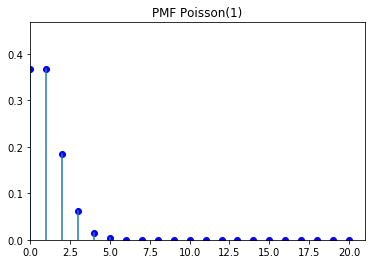

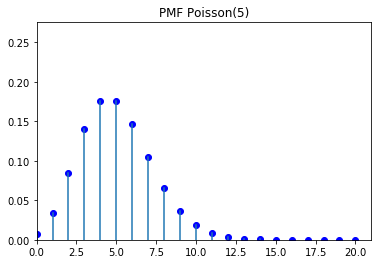

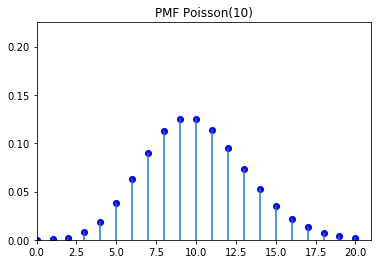

In [13]:
def poisson(mean=1, n=20):
    chances = []
    
    for k in range(n+1):
        chances.append((k, (exp(-mean) * mean**k) / factorial(k)))
    plot_distribution(chances, mean, name="Poisson")
    
    return chances

_ = poisson()

_ = poisson(mean=5)

_ = poisson(mean=10)
        
    